[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
5     Now I am getting angry and I want my damn pho.      0
6              Honeslty it didn't taste THAT fresh.)      0
7  The potatoes were like rubber and you could te...      0
8                          The fries were great too.      1
9                                     A great touch.      1
                                                Review  Liked
990  The refried beans that came with my meal were ...      0
991         Spend your money and time some place else.      0
992  A lady at the table next to us found a live gr...      0
993            the presentation of the food was awful.      0
994           I can't tell you

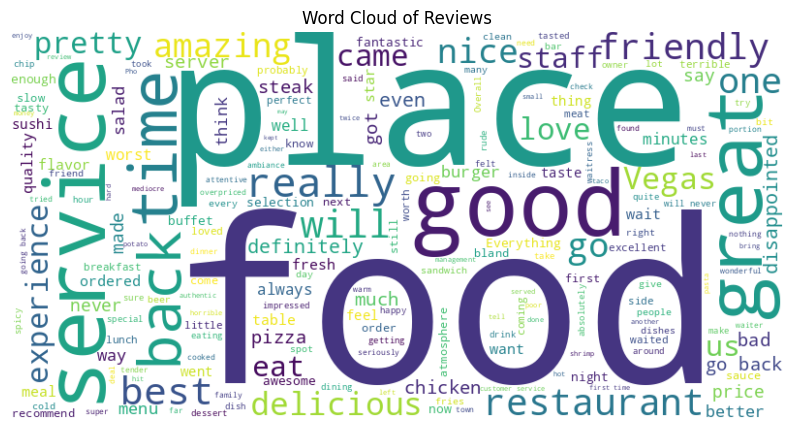

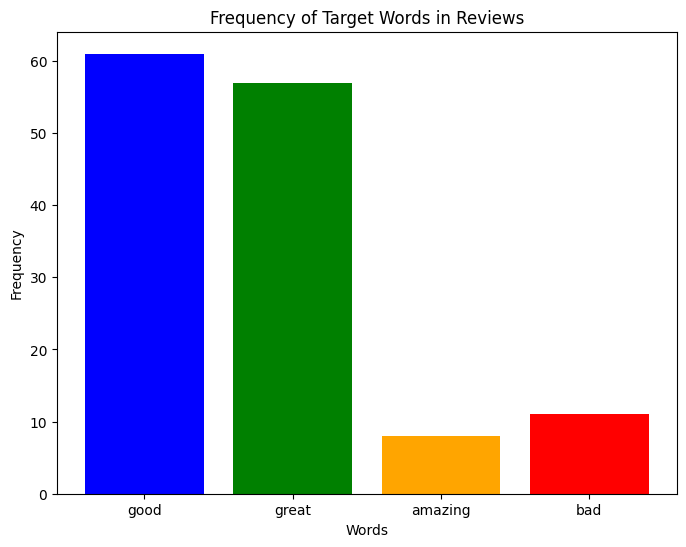

Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        96
           1       0.85      0.75      0.80       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.80       200
weighted avg       0.81      0.80      0.80       200

Enter a review: The food was amazing and the service was great!
Review: 'The food was amazing and the service was great!'
Sentiment: Positive


In [7]:
# ✅ Import libraries
import pandas as pd
import re
import contractions
from bs4 import BeautifulSoup
import emoji
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# ✅ Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Add this line to download the missing resource

# ✅ Load dataset
data = pd.read_csv('/content/Reviews.xls')

# ✅ Explore Data
print(data.head(10))
print(data.tail(10))
print(data.info())
print(data.isnull().sum())
print(data.duplicated().sum())

# ✅ Word Cloud Visualization
combined_text = " ".join(data['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

# ✅ Target Word Frequency Plot
targeted_words = ['good', 'great', 'amazing', 'bad']
all_words = combined_text.lower().split()
word_counts = Counter(all_words)
target_word_count = {word: word_counts[word] for word in targeted_words}

plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(), target_word_count.values(), color=['blue','green','orange','red'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Target Words in Reviews')
plt.show()

# ✅ Lowercased Text
data['Review'] = data['Review'].str.lower()

# ✅ Tokenization
data['Tokens'] = data['Review'].apply(word_tokenize)

# ✅ Remove Stopwords
stop_words = set(stopwords.words('english'))
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# ✅ Stemming
stemmer = PorterStemmer()
data['stemmed'] = data['Review'].apply(lambda x: "".join([stemmer.stem(word) for word in word_tokenize(x)]))

# ✅ Lemmatization
lemmatizer = WordNetLemmatizer()
data['Lemmatized'] = data['Review'].apply(lambda x: ''.join([lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in word_tokenize(x)]))

# ✅ Remove Numbers
data['No_Numbers'] = data['Review'].apply(lambda x: re.sub(r'\d+', '', x))

# ✅ Clean Special Characters
data['cleaned_text'] = data['Review'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s]', '', x))

# ✅ Expand Contractions
data['Expanded'] = data['Review'].apply(contractions.fix)

# ✅ Emoji Demojize
data['Emoji'] = data['Review'].apply(emoji.demojize)

# ✅ Remove HTML Tags
data['Cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())

# ✅ TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Review'])
y = data['Liked']

# ✅ Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Train Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# ✅ Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# ✅ Sentiment Prediction Function
def predict_sentiment(new_review):
    cleaned_review = re.sub(r'[^A-Za-z0-9\s]', '', contractions.fix(new_review.lower()))
    X_new = vectorizer.transform([cleaned_review])
    return model.predict(X_new)[0]

# ✅ Predict from User Input
new_reviews = input("Enter a review: ")
sentiment = predict_sentiment(new_reviews)
sentiment_label = 'Positive' if sentiment == 1 else 'Negative'
print(f"Review: '{new_reviews}'\nSentiment: {sentiment_label}")

In [5]:
%pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 15.3 MB/s eta 0:00:00


In [3]:
%pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.3 MB/s eta 0:00:00
